In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('../data/cleaned_data.csv')
df.dtypes

id                   int64
title               object
year               float64
author_name         object
author_org          object
author_id           object
n_citation         float64
doc_type            object
reference_count    float64
references          object
venue_id           float64
venue_name          object
venue_type          object
doi                 object
keyword             object
volume             float64
issue              float64
publisher           object
weight              object
indexed_keyword     object
inverted_index      object
dtype: object

# Hypothesis 2
> Papers with more authors receive a higher number of citations compared to papers with fewer authors.

- Null Hypothesis (H0): There is no difference in the mean number of citations between papers with many authors and papers with few authors.
- Alternative Hypothesis (H₁): Papers with many authors have a higher mean number of citations than papers with few authors.

### We will be using Independent samples t-test as we are comparing means of 2 independent groups

In [3]:
# Extract necessary columns and drop missing values
df = df[['author_name', 'n_citation']].dropna()

# Calculate the number of authors for each paper
df['num_authors'] = df['author_name'].apply(lambda x: len(x.split(';')))
df

,author_name,n_citation,num_authors
0,leo egghe;ronald rousseau,73.0,2
1,attila kertesz;ferenc otvos;peter kacsuk,5.0,3
2,h. wang;d. wang;z. h. peng,9.0,3
3,qiuju diao;juane li;shu lin;ian f. blake,11.0,4
4,gyda atladottir;ebba thora hvannberg;sigrun gu...,9.0,3
...,...,...,...
5571,marco a. arteaga,28.0,1
5572,ayellet tal;rafael alonso,7.0,2
5573,nan;nan;nan;nan,78.0,4
5574,nol chindapol;jaap a. kaandorp;carolina cronem...,30.0,5


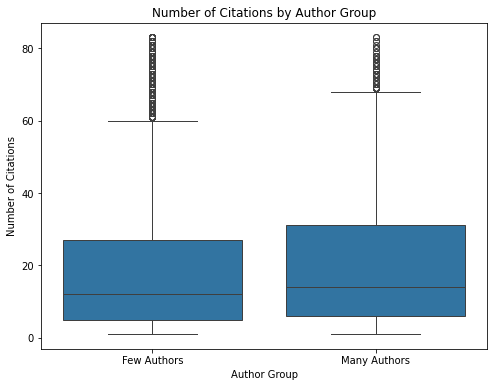

T-Statistic: 3.9775
P-value: 7.1329e-05
Reject the null hypothesis: Papers with more authors have significantly more num citations.


In [5]:
# Determine the median number of authors
median_authors = df['num_authors'].median()

# Label papers as 'Many Authors' or 'Few Authors' based on median
df['author_group'] = np.where(df['num_authors'] > median_authors, 'Many Authors', 'Few Authors')

# Boxplot to visualize the differences
plt.figure(figsize=(8, 6))
sns.boxplot(x='author_group', y='n_citation', data=df)
plt.title('Number of Citations by Author Group')
plt.xlabel('Author Group')
plt.ylabel('Number of Citations')
plt.show()

# Separate the groups
group_many_authors = df[df['author_group'] == 'Many Authors']['n_citation']
group_few_authors = df[df['author_group'] == 'Few Authors']['n_citation']

# Perform the t-test
t_stat, p_value = ttest_ind(group_many_authors, group_few_authors, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

alpha = 0.05
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: Papers with more authors have significantly more num citations.")
else:
    print("Fail to reject the null hypothesis: No significant difference in citations based on the number of authors.")


> Paper with more authors receive more citations

# Hypothesis 5:
Papers published in high-impact journals receive more citations than those in lower-impact journals.

- Null Hypothesis (H₀): No difference in citation counts between high-impact and low-impact journals.
- Alternative Hypothesis (H₁): High-impact journals have higher citation counts.


We'll be using t-test.

In [14]:
df = pd.read_csv('../data/cleaned_data.csv')
df

,id,title,year,author_name,author_org,author_id,n_citation,doc_type,reference_count,references,...,venue_name,venue_type,doi,keyword,volume,issue,publisher,weight,indexed_keyword,inverted_index
0,1809800090,"co-citation, bibliographic coupling and a char...",2002.0,leo egghe;ronald rousseau,"luc, diepenbeek, (belgium);luc, diepenbeek, (b...",2894597188;2026323400,73.0,journal,11.0,1797388287;1982339055;1984066943;1987777228;20...,...,scientometrics,j,https://doi.org/10.1023/a:1020458612014,graph theory;data mining;combinatorics;lattice...,55.0,3.0,springer,0.51547;0.40765;0.43625;0.42805;0.4422;0.41305...,"co-citation,;called;coupling;generalized;prope...","[31];[37];[28];[26, 30];[36, 41];[55];[64];[62..."
1,1818750958,a case study for biochemical application porti...,2014.0,attila kertesz;ferenc otvos;peter kacsuk,mta sztaki computer and automation research in...,2098474773;2661082511;1988113753,5.0,journal,13.0,72121196;1902317482;1976625418;1979653769;1986...,...,concurrency and computation: practice and expe...,j,https://doi.org/10.1002/cpe.3115,simulated annealing;usable;grid computing;comp...,26.0,10.0,john wiley and sons ltd.,0.46688;0.47212;0.55151;0.45204;0.45567;0.4611...,"modeling,;application.;graphical;john;experime...",[28];[166];[162];[169];[135];[147];[88];[68];[...
2,1817579882,adaptive neural control for cooperative path f...,2016.0,h. wang;d. wang;z. h. peng,"state key laboratory of robotics, shenyang ins...",2589921966;2438771231;2163158412,9.0,journal,28.0,1965412770;1966158493;1977485777;1988098565;19...,...,international journal of systems science,j,https://doi.org/10.1080/00207721.2015.1056274,graph theory;synchronization;backstepping;cont...,47.0,2.0,taylor & francis,0.5094;0.4984;0.54109;0.56865;0.47311;0.48347;...,disturbances;closed-loop;accurate;constraints;...,"[18];[176];[134];[62];[133, 157];[69];[146];[1..."
3,1814908610,new classes of partial geometries and their as...,2016.0,qiuju diao;juane li;shu lin;ian f. blake,", cnex labs, inc., san jose, ca, usa;departmen...",2490008024;2697071663;2157164792;2171985282,11.0,journal,36.0,1580362924;1972907329;1982045017;2001732758;20...,...,ieee transactions on information theory,j,https://doi.org/10.1109/tit.2015.2508455,discrete mathematics;combinatorics;concatenate...,62.0,6.0,ieee,0.46367;0.4574;0.56995;0.60146;0.56361;0.57107...,considered;channel;adjacency;construct;bit;typ...,"[136, 159];[31, 230];[178];[6];[38];[64, 85];[..."
4,1963699660,comparing task practicing and prototype fideli...,2012.0,gyda atladottir;ebba thora hvannberg;sigrun gu...,"univ. of iceland, reykjavík, iceland;univ. of ...",2284234460;1989927901;2157752482,9.0,journal,24.0,1526426957;1966591371;1973603982;1976268474;19...,...,requirements engineering,j,https://doi.org/10.1007/s00766-011-0131-2,systems engineering;computer science;usability...,17.0,3.0,springer-verlag,0.44903;0.4486;0.51227;0.62117;0.46951;0.0;0.4...,practice;accurate;told;acting.;participants;wh...,"[104, 149, 182, 278];[1];[102];[66, 132];[67];..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,2095008336,brief robot control and parameter estimation w...,2003.0,marco a. arteaga,"universidad nacional autónoma de méxico, depfi...",2168086267,28.0,journal,6.0,2048857184;2122739526;2127891097;2128081723;21...,...,automatica,j,https://doi.org/10.1016/s0005-1098(02)00166-8,robot control;control theory;tachometer;encode...,39.0,1.0,"pergamon press, inc.",0.53548;0.46448;0.45525;0.44803;0.54248;0.4939...,through;joint;use;most;boundedness;delivered;d...,"[54];[43, 52];[37];[0];[70];[29];[49];[94];[81..."
5572,2087561570,commit protocols for externalized-commit heter...,1994.0,ayellet tal;rafael alonso,"computer science department, princeton univers...",2282829714;2138960101,7.0,journal,10.0,1545155892;1551439321;1811909632;1847450659;20...,...,distributed and parallel databases,j,https://doi.org/10.1007/bf01267327,computer science;commit;database testing;distr...,2.0,2

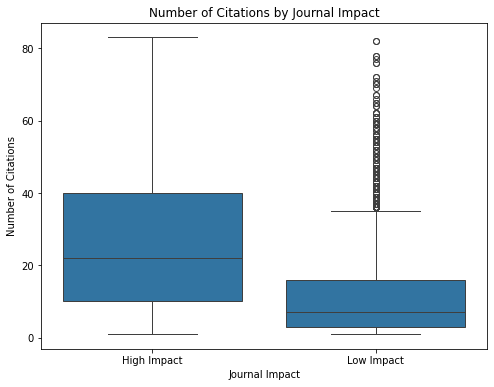

T-Statistic: 32.7283
P-value: 2.0389e-211
Reject the null hypothesis: High-impact journals have significantly higher citation counts.


In [15]:
# Ensure necessary columns are present
df_cleaned = df[['venue_name', 'n_citation']].dropna()

# Calculate average citations per journal
journal_citation_stats = df_cleaned.groupby('venue_name')['n_citation'].mean().reset_index()
journal_citation_stats.rename(columns={'n_citation': 'avg_citations'}, inplace=True)

# Merge back to the main DataFrame
df_merged = pd.merge(df_cleaned, journal_citation_stats, on='venue_name', how='left')

# Determine the median of average citations
median_avg_citations = df_merged['avg_citations'].median()

# Classify journals as 'High Impact' or 'Low Impact'
df_merged['journal_impact'] = np.where(df_merged['avg_citations'] > median_avg_citations, 'High Impact', 'Low Impact')


# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='journal_impact', y='n_citation', data=df_merged)
plt.title('Number of Citations by Journal Impact')
plt.xlabel('Journal Impact')
plt.ylabel('Number of Citations')
plt.show()

# Separate the groups
group_high_impact = df_merged[df_merged['journal_impact'] == 'High Impact']['n_citation']
group_low_impact = df_merged[df_merged['journal_impact'] == 'Low Impact']['n_citation']

# Perform the t-test
t_stat, p_value = ttest_ind(group_high_impact, group_low_impact, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: High-impact journals have significantly higher citation counts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in citation counts between journal impact levels.")

> Papers in high impact journals receive more citations.